## Creating a Model

In [1]:
import pandas as pd

df = pd.read_parquet("../0 - Data/scaled_transactions.pq")
df.head()

,Amount,MCC,Has Chip,Cards Issued,Credit Limit,Year PIN last Changed,Current Age,Retirement Age,Birth Year,Birth Month,...,Card Brand_Visa,Card Type_Debit,Card Type_Debit (Prepaid),Gender_Male,Age Group_26-35,Age Group_36-45,Age Group_46-60,Age Group_60+,Use Chip_Online Transaction,Use Chip_Swipe Transaction
0,130.95,5912,1,2,24295.0,2008,53,66,1966,11,...,True,True,False,False,False,False,True,False,False,False
1,130.95,5912,1,2,21968.0,2014,53,66,1966,11,...,True,True,False,False,False,False,True,False,False,False
2,130.95,5912,1,2,46414.0,2004,53,66,1966,11,...,True,True,False,False,False,False,True,False,False,False
3,130.95,5912,0,1,12400.0,2012,53,66,1966,11,...,True,False,False,False,False,False,True,False,False,False
4,130.95,5912,1,1,28.0,2009,53,66,1966,11,...,False,False,True,False,False,False,True,False,False,False


#### Split the data into training and test

In [2]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

split_date = '2019-10-01 00:00:00'

train_data = df[df['Datetime'] < split_date]
test_data = df[df['Datetime'] >= split_date]

#### Drop the Datetime Column

In [3]:
train_data = train_data.drop(["Datetime"], axis=1)
test_data = test_data.drop(["Datetime"], axis=1)

#### Create X and y Vectors

In [4]:
target_column = 'Is Fraud'

# Separate features and target for the training set
X_train = train_data.drop(target_column, axis=1)
y_train = train_data[target_column]

# Separate features and target for the test set
X_test = test_data.drop(target_column, axis=1)
y_test = test_data[target_column]

#### Train the Model

In [5]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    task_type='GPU',  # Use GPU
    random_seed=42,
    verbose=0 
)

# Train the model
model.fit(X_train, y_train)

#### Model Predictions

In [7]:
# Make probability predictions
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1) based on a threshold, usually 0.5
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

#### Test the Predictions

In [8]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9995790535552388


In [9]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   2671415
           1       0.76      0.01      0.02      1134

    accuracy                           1.00   2672549
   macro avg       0.88      0.51      0.51   2672549
weighted avg       1.00      1.00      1.00   2672549



In [10]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC-AUC score using the probability predictions
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.5057311737316841


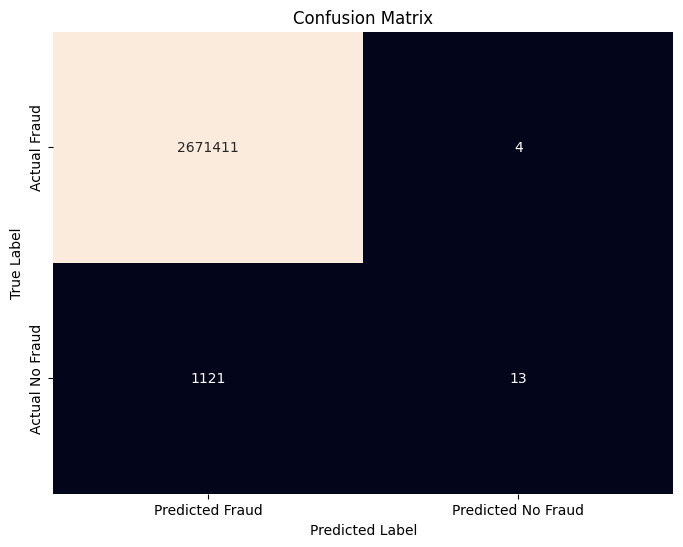

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Fraud', 'Actual No Fraud'], columns=['Predicted Fraud', 'Predicted No Fraud'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Evaluation

